# Supervised Learning - Project

In this Project, we are going to perform a full unsupervised learning machine learning project on a "Wholesale Data" dataset. The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

[Kaggle Link](https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set)

# Part I : EDA - Exploratory Data Analysis & Pre-processing

The given dataset seems to be a grocery sales dataset containing information about various products sold by a grocery store. To perform an exploratory data analysis (EDA) on this dataset, we can perform the following tasks:

- Data Import: Import the dataset into a statistical software tool such as Python or R.
- Data Cleaning: Check the dataset for any missing or incorrect data and clean the dataset accordingly. This may involve removing or imputing missing data or correcting any obvious errors.
Data Description: Generate summary statistics such as mean, median, and standard deviation for each column of the dataset. This will help in understanding the distribution of data in each column.
- Data Visualization: Create various visualizations such as histograms, box plots, scatter plots, and heatmaps to understand the relationships and trends between the different variables in the dataset. For example, we can create a scatter plot between the "Fresh" and "Milk" variables to see if there is any correlation between them.
- Outlier Detection: Check for any outliers in the dataset and determine whether they are valid or erroneous data points.
- Correlation Analysis: Calculate the correlation between different variables in the dataset to determine which variables are highly correlated and which ones are not. For example, we can calculate the correlation between "Grocery" and "Detergents_Paper" to see if there is any relationship between these two variables.
- Data Transformation: If necessary, transform the data by standardizing or normalizing the variables to make them comparable across different scales.
- Feature Selection: Identify the most important features or variables that contribute the most to the overall variance in the dataset. This can be done using various feature selection techniques such as principal component analysis (PCA) or random forest regression.

In [80]:
#Import relevant packages for data processing

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [85]:
#Import DataFrame from CSV

df = pd.read_csv('Wholesale_Data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [86]:
#Check shape of DataFrame

df.shape

(440, 8)

In [87]:
#Check details of DataFrame

df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


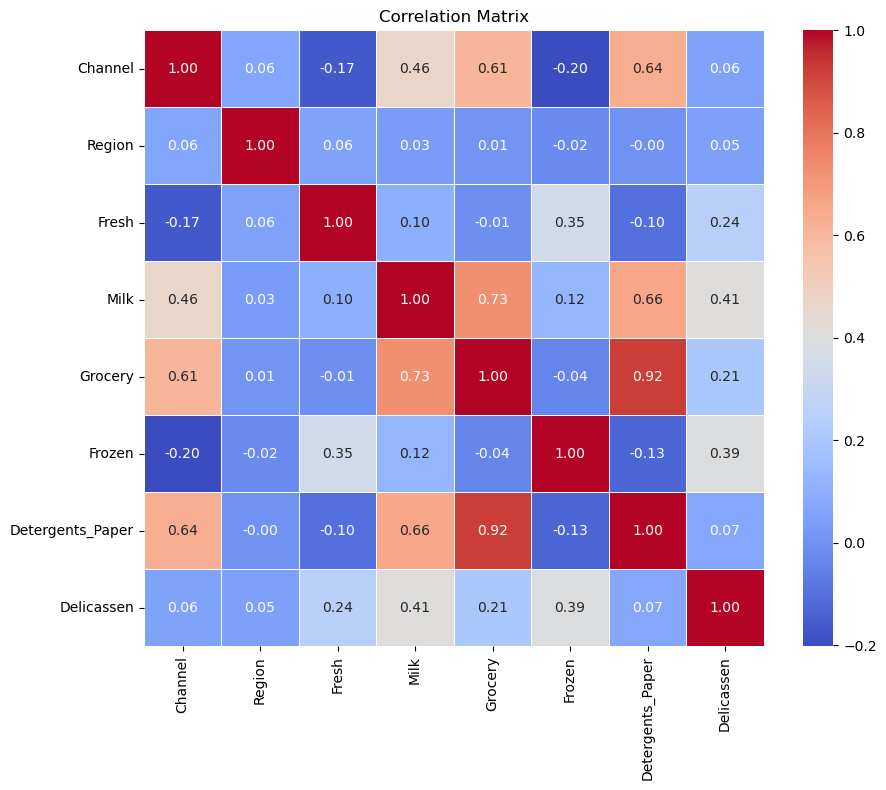

In [88]:
#Check correlation of features within the DataFrame
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

Based on the correlation matrix, we can see the majority of corelation occurs with the Channel feature along with some inter-feature correlation. We will drop the "Channel" and "Region" as we are focusing on unsupervised learning

In [89]:
#Drop Channel and Region features for unsupervised learning

df = df.drop(['Channel', 'Region'], axis = 1)

In [90]:
df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [91]:
stats = df.describe()
print(stats)

               Fresh          Milk       Grocery        Frozen  \
count     440.000000    440.000000    440.000000    440.000000   
mean    12000.297727   5796.265909   7951.277273   3071.931818   
std     12647.328865   7380.377175   9503.162829   4854.673333   
min         3.000000     55.000000      3.000000     25.000000   
25%      3127.750000   1533.000000   2153.000000    742.250000   
50%      8504.000000   3627.000000   4755.500000   1526.000000   
75%     16933.750000   7190.250000  10655.750000   3554.250000   
max    112151.000000  73498.000000  92780.000000  60869.000000   

       Detergents_Paper    Delicassen  
count        440.000000    440.000000  
mean        2881.493182   1524.870455  
std         4767.854448   2820.105937  
min            3.000000      3.000000  
25%          256.750000    408.250000  
50%          816.500000    965.500000  
75%         3922.000000   1820.250000  
max        40827.000000  47943.000000  


In [94]:
#Identfiy outliers below 2% and 98% quantile. This was found iteratively by looking at how many values fell outside this range to avoid removing too much of the data

q02 = df.quantile(0.02)
q98 = df.quantile(0.98)

In [95]:
#Identify outliers outside of the range

outliers_below = df < q02
outliers_above = df > q98

In [97]:
#Count and summarize the number of outliers

count_below = outliers_below.sum()
count_above = outliers_above.sum()

In [99]:
#Print the results
print("Number of points outside the 2%-98% range for each column:")
print("Below 2%:")
print(count_below)
print("\nAbove 98%:")
print(count_above)

Number of points outside the 2%-98% range for each column:
Below 2%:
Fresh               9
Milk                9
Grocery             9
Frozen              9
Detergents_Paper    9
Delicassen          9
dtype: int64

Above 98%:
Fresh               9
Milk                9
Grocery             9
Frozen              9
Detergents_Paper    9
Delicassen          9
dtype: int64


In [100]:
#Filter out outliers and display the final dataframe

outliers_rows = outliers_below.any(axis=1) | outliers_above.any(axis=1)

df_filtered = df[~outliers_rows]

# Display the result
print("DataFrame after dropping rows outside the 2%-98% range:")
print(df_filtered)

DataFrame after dropping rows outside the 2%-98% range:
     Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0    12669   9656     7561     214              2674        1338
1     7057   9810     9568    1762              3293        1776
3    13265   1196     4221    6404               507        1788
4    22615   5410     7198    3915              1777        5185
5     9413   8259     5126     666              1795        1451
..     ...    ...      ...     ...               ...         ...
434  16731   3922     7994     688              2371         838
435  29703  12051    16027   13135               182        2204
436  39228   1431      764    4510                93        2346
437  14531  15488    30243     437             14841        1867
438  10290   1981     2232    1038               168        2125

[369 rows x 6 columns]


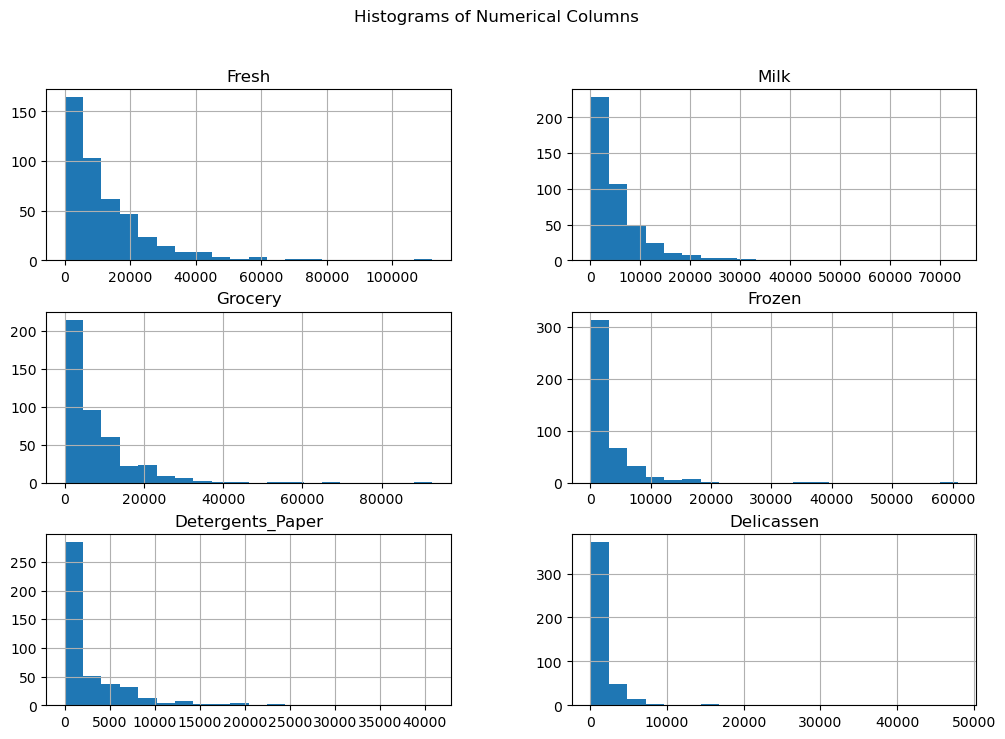

In [101]:
#Check distribution of histogram

df.hist(figsize=(12, 8), bins=20)
plt.suptitle('Histograms of Numerical Columns')
plt.show()

In [106]:
#Import Standard Scaler and scale the data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_filtered)

# Part II - KMeans Clustering

The objective of the analysis is to group similar products together into clusters based on their attributes such as fresh, milk, grocery, frozen, detergents_paper, and delicatessen. To perform the k-means clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters, initialize the centroids, assign data points to clusters, update the centroids, and repeat until convergence.

In [107]:
#Conduct KMeans clustering between 1-10 clusters to determine optimal number based on elbow method

from sklearn.cluster import KMeans

min_clusters = 1
max_clusters = 10 

inertia_values = []

for k in range(min_clusters, max_clusters + 1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia_values.append(kmeans.inertia_)

/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: Fut

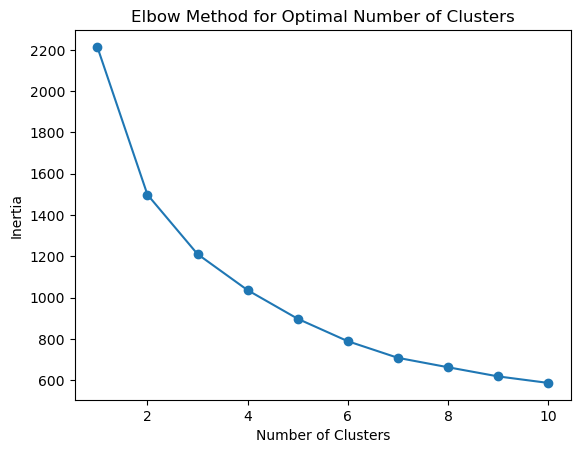

In [108]:
#Plot graph of the elbow method

plt.plot(range(min_clusters, max_clusters + 1), inertia_values, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Part III - Hierarchical Clustering 

Hierarchical clustering is a popular unsupervised machine learning algorithm that is used to identify patterns and group similar data points together in a hierarchy. The algorithm works by iteratively merging or splitting clusters based on a similarity measure until a dendrogram is formed.

To perform hierarchical clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters using techniques such as dendrogram.

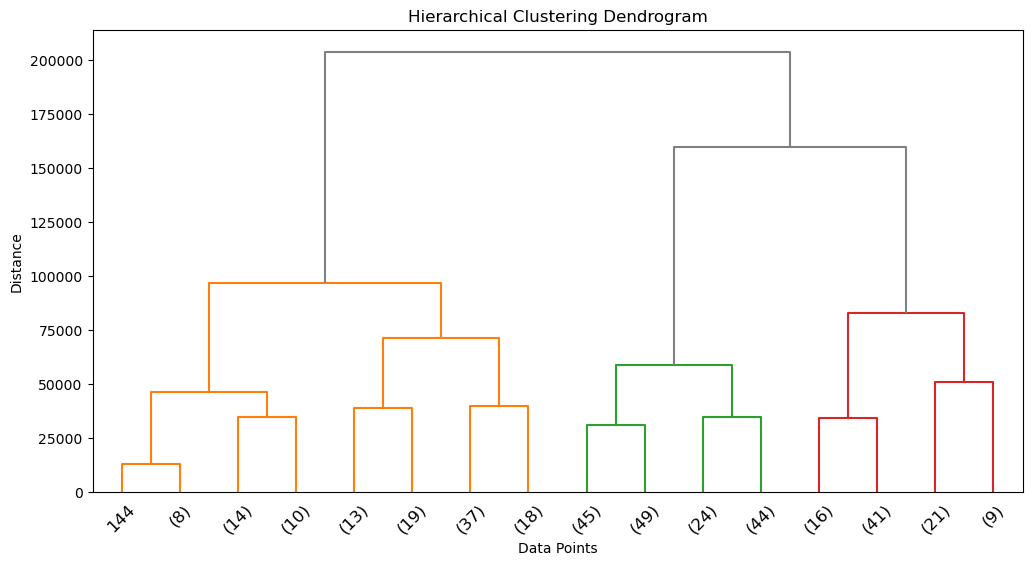

In [116]:
#Import Hierarchical Clustering and plot the Dendrogram

from scipy.cluster.hierarchy import dendrogram, linkage

linkage_matrix = linkage(df_filtered, method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, truncate_mode='level', p=3, leaf_rotation=45, leaf_font_size=12, above_threshold_color='gray')
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

# Part IV - PCA

In this section you are going to perform principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

In [117]:
#Import PCA

from sklearn.decomposition import PCA

In [118]:
#Conduct PCA Analysis for each component 

num_components = min(scaled_data.shape[0], scaled_data.shape[1])  # Number of components = min(n_samples, n_features)
pca = PCA(n_components=num_components)
principal_components = pca.fit_transform(scaled_data)

In [119]:
#Calculate the explained variance for each component

explained_var_ratio = pca.explained_variance_ratio_
cumulative_var_ratio = explained_var_ratio.cumsum()

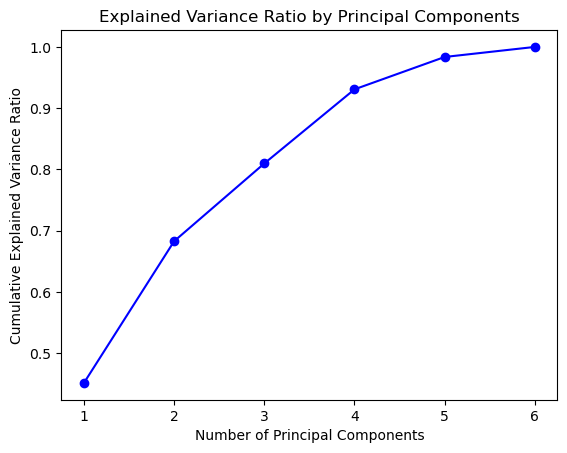

In [120]:
#Plot results

plt.plot(range(1, num_components + 1), cumulative_var_ratio, marker='o', linestyle='-', color='b')
plt.title('Explained Variance Ratio by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.show()

In [122]:
#Based on the graph, 4 is the optimal number of components as it explains close to 90% of the variance'

num_selected_components = 4

In [123]:
pca_selected = PCA(n_components=num_selected_components)
data_pca_selected = pca_selected.fit_transform(scaled_data)

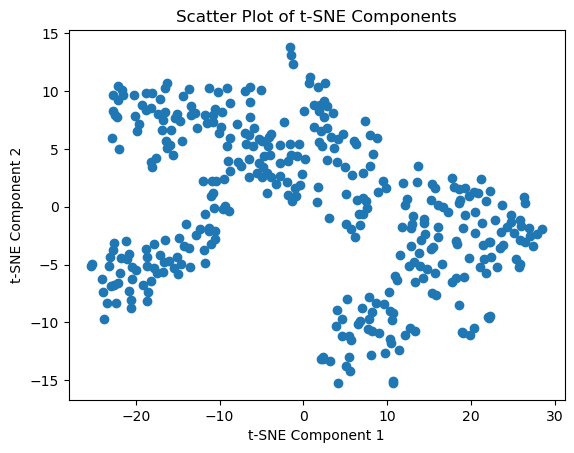

In [129]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
data_tsne = tsne.fit_transform(scaled_data)

plt.scatter(data_tsne[:, 0], data_tsne[:, 1])
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('Scatter Plot of t-SNE Components')
plt.show()

# Part V - Conclusion

From the model you developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

Based on the model conducted and the analysis done these are my findings:

1) Small datasets such as this one are tough to work with. I initially chose to look at outliers outside of the IQR, however, this removed too much data and settled on a very thin range. Ideally, if we had more data this would be better in predicting the outcomes
2) KMeans clustering is a useful tool only if iterated through a number of different features as randomly guessing the clusters is often challenging. In this case it was quite easy as we knew that the categories could fall into 1/6 groups, however, in many real world datasets this is not the case
3) Hierarchical clustering is useful for visualizing the dataset and identifying the number of clusters since our overall dataset was quite small, however, I can see this becoming impractical very quicky as the dataset grows
4) PCA is the most useful of all the Unsupervised Learning algorithms as it provides explainability of all of the components in a clear and easy way to understand. Furthermore, as algorithms continue to get more complex, easily being to identify which core features can explain the majority of the variability is a very useful feature